In [111]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy 
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r'D:\Portfolio\Project 4\movies.csv')

ModuleNotFoundError: No module named 'scipy'

In [15]:
# Let's look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.      146  
1   58853106   Columbia Pictures      104  
2  538375067           Lucasfilm      124  
3   83453539  Paramount Pictures       88  
4   39846344      Orion Pictures       98

In [7]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
# The missing data is a subject to further investigation, analysis and filling of the missing data with the real values,
# but this project is a little different, so we are going to skip this step

In [59]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [14]:
# Changing the data type of columns with filling zeroes in all the missing data

df = df.fillna(0)
df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [94]:
# In Kaggle the year column is the production year, but we need the release year
# So, we are creating the correct year column

df['yearcorrect'] = df['released'].astype(str).apply(
lambda x: x[x.find(",") + 2 : x.find("(") - 1]
)
                               

In [98]:
df.sort_values(by = ['gross'], inplace = False, ascending = False)

name rating    genre  year  \
5445                                      Avatar  PG-13   Action  2009   
7445                           Avengers: Endgame  PG-13   Action  2019   
3045                                     Titanic  PG-13    Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13   Action  2015   
7244                      Avengers: Infinity War  PG-13   Action  2018   
...                                          ...    ...      ...   ...   
1617                             Mortal Passions      R    Crime  1989   
1614                              Edge of Sanity      R   Horror  1989   
1606                                   I, Madman      R  Fantasy  1989   
1601                        My Twentieth Century      0   Comedy  1989   
7667                                   Tee em el      0   Horror  2020   

                               released  score    votes        director  \
5445  December 18, 2009 (United States)    7.8  1100000   James Cameron   
7445     April 26, 2019 (United States)    8.4   903000   Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000   James Cameron   
6663  December 18, 2015 (United States)    7.8   876000     J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000   Anthony Russo   
...                                 ...    ...      ...             ...   
1617   January 26, 1990 (United States)    4.5      274     Andrew Lane   
1614     April 14, 1989 (United States)    5.2     1300  Gérard Kikoïne   
1606      April 7, 1989 (United States)    6.0     2900    Tibor Takács   
1601           January 13, 1990 (Japan)    7.1     1500   Ildikó Enyedi   
7667    August 19, 2020 (United States)    5.7        7    Pereko Mosia   

                  writer               star         country     budget  \
5445       James Cameron    Sam Worthington   United States  237000000   
7445  Christopher Markus  Robert Downey Jr.   United States  356000000   
3045       James Cameron  Leonardo DiCaprio   United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley   United States  245000000   
7244  Christopher Markus  Robert Downey Jr.   United States  321000000   
...                  ...                ...             ...        ...   
1617      Alan Moskowitz      Zach Galligan   United States          0   
1614          J.P. Félix    Anthony Perkins  United Kingdom          0   
1606       David Chaskin       Jenny Wright          Canada          0   
1601       Ildikó Enyedi       Dorota Segda         Hungary          0   
7667        Pereko Mosia   Siyabonga Mabaso    South Africa          0   

           gross                          company  runtime yearcorrect  
5445  2847246203            Twentieth Century Fox      162        2009  
7445  2797501328                   Marvel Studios      181        2019  
3045  2201647264            Twentieth Century Fox      194        1997  
6663  2069521700                        Lucasfilm      138        2015  
7244  2048359754                   Marvel Studios      149        2018  
...          ...                              ...      ...         ...  
1617           0          Gibraltar Entertainment       92        1990  
1614           0                    Allied Vision       85        1989  
1606           0  Trans World Entertainment (TWE)       89        1989  
1601           0         Budapest Stúdió Vállalat      104        1990  
7667           0                      PK 65 Films      102        2020  

[7668 rows x 16 columns]

In [99]:
pd.set_option('display.max_rows', None)

In [102]:
# Making the df sorted on the gross for the future convenience
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [ ]:
# Drop any duplicates

df['company'].drop_duplicates.sort_values(ascending = False)

# We will see that e.g. there are multiple Walt Disney companies. They are there because the company itself has had several
# names throughout the years

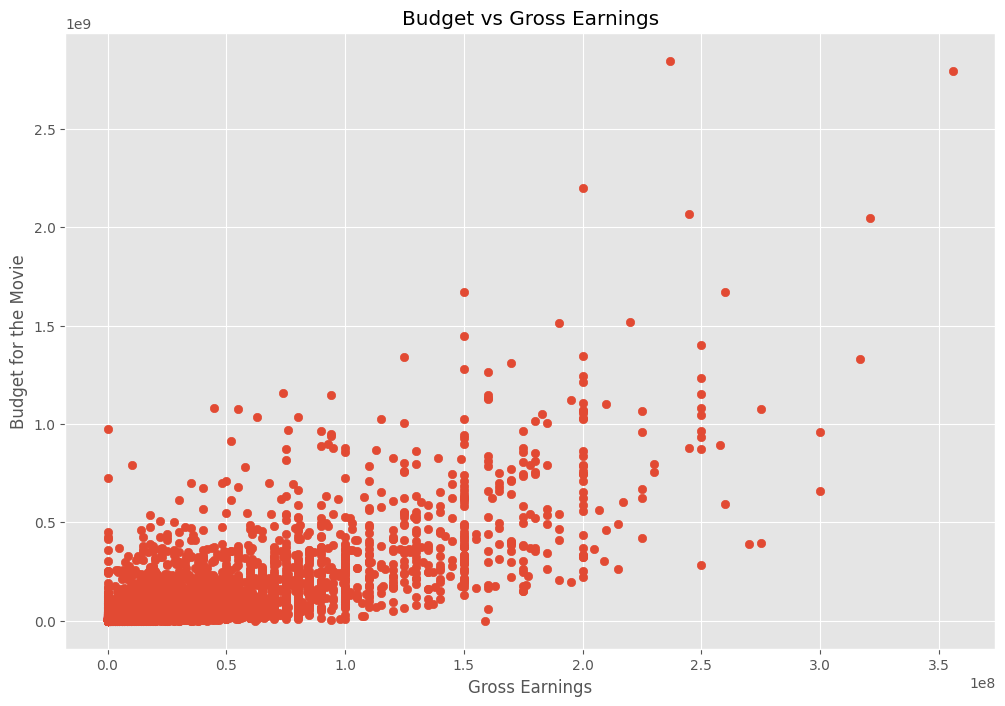

In [105]:
# Scatter plot with budget vs gross revenue

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for the Movie')
plt.show()

In [104]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox      162        2009  
7445  2797501328         Marvel Studios      181        2019  
3045  2201647264  Twentieth Century Fox      194        1997  
6663  2069521700              Lucasfilm      138        2015  
7244  2048359754         Marvel Studios      149        2018

<AxesSubplot: xlabel='budget', ylabel='gross'>

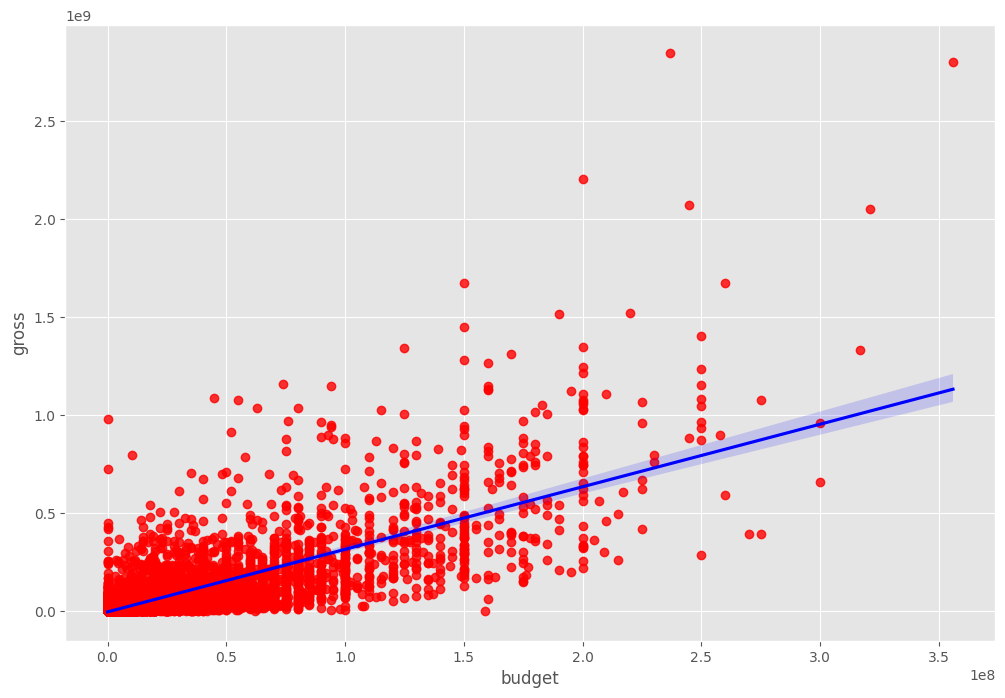

In [107]:
# Plot the Budget vs Gross using seaborn
# Predicting that there is a high correlation between the Budget and Gross values

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

In [114]:
# Let's start looking at correlation

df.corr(method = 'pearson')   #pearson (used by default), kendall, spearman

C:\Users\Hvx\AppData\Local\Temp\ipykernel_2952\2169589546.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')   #pearson (used by default), kendall, spearman


year     score     votes    budget     gross   runtime
year     1.000000  0.092616  0.222427  0.309212  0.261900  0.116358
score    0.092616  1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.222427  0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.309212  0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.261900  0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.116358  0.394564  0.306984  0.268372  0.244339  1.000000

In [ ]:
# High correlation between Budget and Gross

C:\Users\Hvx\AppData\Local\Temp\ipykernel_2952\56567067.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


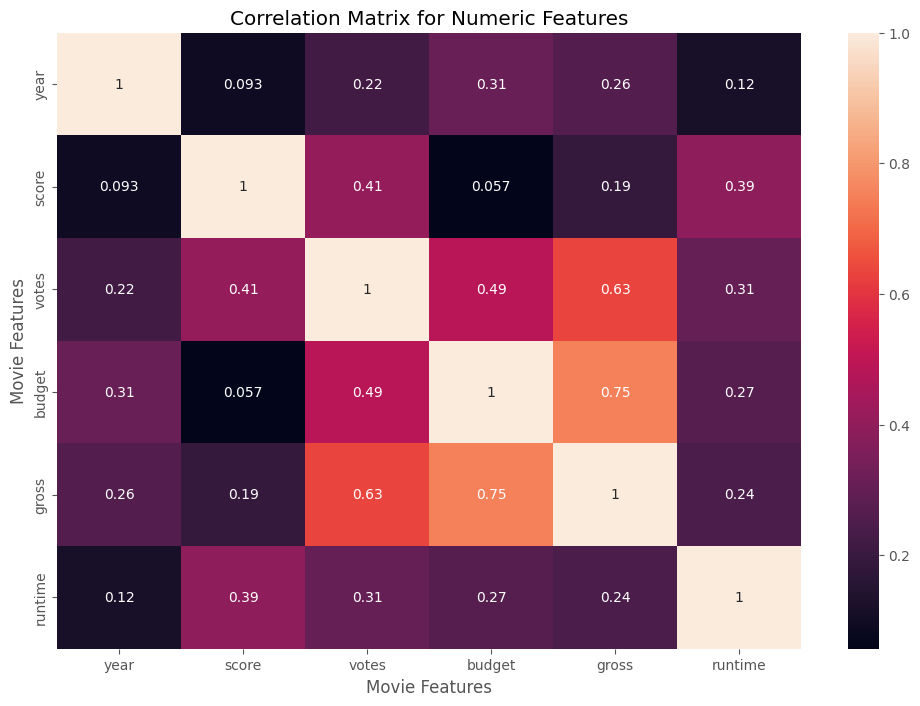

In [118]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [120]:
# Looks at companies, hoping that the companies also have high correlation with the gross earnings
# To find the correlation for the companies we need to apply the individual unique numeric identifiers to them
# We will also do that fo all the object types in our dataframe

df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

name  rating  genre  year  \
5445                                             Avatar       6      0  2009   
7445                                  Avengers: Endgame       6      0  2019   
3045                                            Titanic       6      6  1997   
6663         Star Wars: Episode VII - The Force Awakens       6      0  2015   
7244                             Avengers: Infinity War       6      0  2018   
7480                                      The Lion King       5      2  2019   
6653                                     Jurassic World       6      0  2015   
6043                                       The Avengers       6      0  2012   
6646                                          Furious 7       6      0  2015   
7494                                          Frozen II       5      2  2019   
6644                            Avengers: Age of Ultron       6      0  2015   
7247                                      Black Panther       6      0  2018   
5845       Harry Potter and the Deathly Hallows: Part 2       6      1  2011   
7075            Star Wars: Episode VIII - The Last Jedi       6      0  2017   
7271                     Jurassic World: Fallen Kingdom       6      0  2018   
6262                                             Frozen       5      2  2013   
7072                               Beauty and the Beast       5      7  2017   
7281                                      Incredibles 2       5      2  2018   
7055                            The Fate of the Furious       6      0  2017   
6244                                         Iron Man 3       6      0  2013   
6688                                            Minions       5      2  2015   
6846                         Captain America: Civil War       6      0  2016   
7250                                            Aquaman       6      0  2018   
4245      The Lord of the Rings: The Return of the King       6      0  2003   
7458                          Spider-Man: Far from Home       6      0  2019   
7456                                     Captain Marvel       6      0  2019   
5878                     Transformers: Dark of the Moon       6      0  2011   
6059                                            Skyfall       6      0  2012   
6494                    Transformers: Age of Extinction       6      0  2014   
2448                                      The Lion King       2      2  1994   
6047                              The Dark Knight Rises       6      0  2012   
7463      Star Wars: Episode IX - The Rise of Skywalker       6      0  2019   
7450                                              Joker       7      5  2019   
7488                                        Toy Story 4       2      2  2019   
5685                                        Toy Story 3       2      2  2010   
4852         Pirates of the Caribbean: Dead Man's Chest       6      0  2006   
6869                       Rogue One: A Star Wars Story       6      0  2016   
7481                                            Aladdin       5      1  2019   
5860        Pirates of the Caribbean: on Stranger Tides       6      0  2011   
7140                                    Despicable Me 3       5      2  2017   
2245                                      Jurassic Park       6      0  1993   
6908                                       Finding Dory       5      2  2016   
3451          Star Wars: Episode I - The Phantom Menace       5      0  1999   
5667                                Alice in Wonderland       5      1  2010   
6863                                           Zootopia       5      2  2016   
6045                  The Hobbit: An Unexpected Journey       6      1  2012   
3843              Harry Potter and the Sorcerer's Stone       5      1  2001   
5243                                    The Dark Knight       6      0  2008   
5652       Harry Potter and the Deathly Hallows: Part 1       6      1  2010   
6311                                    Despicable 

C:\Users\Hvx\AppData\Local\Temp\ipykernel_2952\1078810248.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_numerized.corr(method = 'pearson')


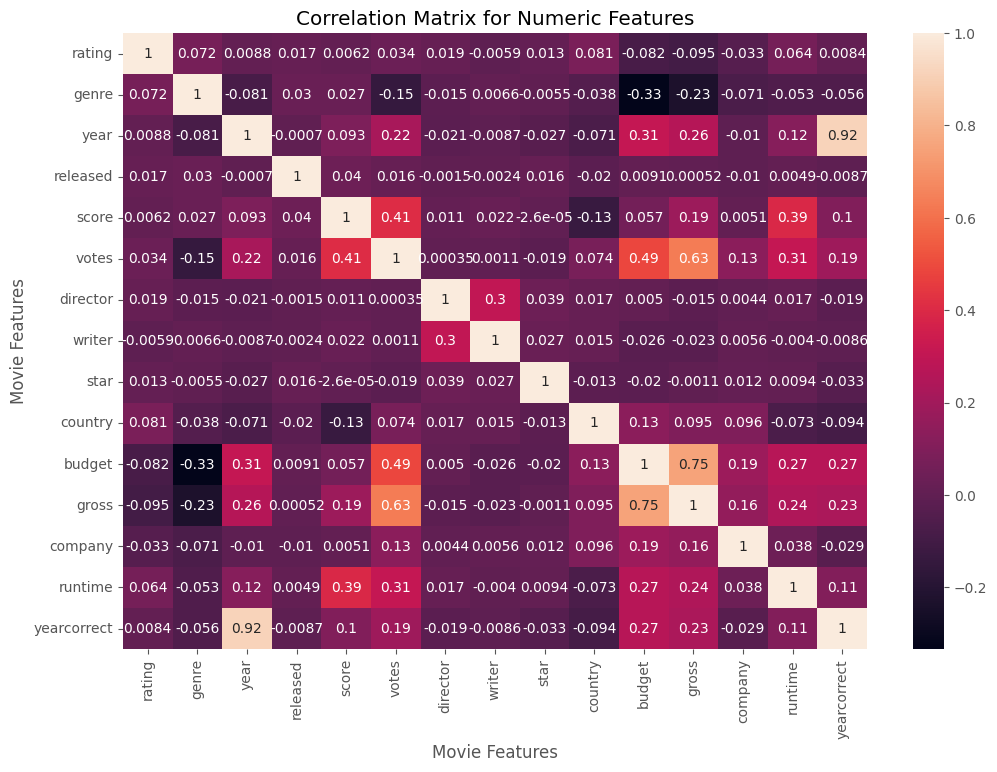

In [122]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [123]:
df_numerized.corr()

C:\Users\Hvx\AppData\Local\Temp\ipykernel_2952\1284351489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_numerized.corr()


rating     genre      year  released     score     votes  \
rating       1.000000  0.072423  0.008779  0.016613  0.006192  0.033743   
genre        0.072423  1.000000 -0.081261  0.029822  0.027384 -0.145296   
year         0.008779 -0.081261  1.000000 -0.000695  0.092616  0.222427   
released     0.016613  0.029822 -0.000695  1.000000  0.039814  0.015878   
score        0.006192  0.027384  0.092616  0.039814  1.000000  0.407101   
votes        0.033743 -0.145296  0.222427  0.015878  0.407101  1.000000   
director     0.019483 -0.015258 -0.020795 -0.001478  0.010568  0.000349   
writer      -0.005921  0.006567 -0.008656 -0.002404  0.022098  0.001127   
star         0.013405 -0.005477 -0.027242  0.015777 -0.000026 -0.019146   
country      0.081244 -0.037615 -0.070938 -0.020427 -0.133346  0.073525   
budget      -0.081939 -0.334021  0.309212  0.009145  0.056863  0.486931   
gross       -0.095450 -0.234297  0.261900  0.000519  0.186012  0.632870   
company     -0.032943 -0.071067 -0.010431 -0.010474  0.005081  0.133457   
runtime      0.064133 -0.052914  0.116358  0.004852  0.394564  0.306984   
yearcorrect  0.008405 -0.055560  0.916496 -0.008665  0.100464  0.192141   

             director    writer      star   country    budget     gross  \
rating       0.019483 -0.005921  0.013405  0.081244 -0.081939 -0.095450   
genre       -0.015258  0.006567 -0.005477 -0.037615 -0.334021 -0.234297   
year        -0.020795 -0.008656 -0.027242 -0.070938  0.309212  0.261900   
released    -0.001478 -0.002404  0.015777 -0.020427  0.009145  0.000519   
score        0.010568  0.022098 -0.000026 -0.133346  0.056863  0.186012   
votes        0.000349  0.001127 -0.019146  0.073525  0.486931  0.632870   
director     1.000000  0.299067  0.039234  0.017490  0.004976 -0.014916   
writer       0.299067  1.000000  0.027245  0.015343 -0.025911 -0.022997   
star         0.039234  0.027245  1.000000 -0.012998 -0.019952 -0.001129   
country      0.017490  0.015343 -0.012998  1.000000  0.131720  0.095325   
budget       0.004976 -0.025911 -0.019952  0.131720  1.000000  0.750157   
gross       -0.014916 -0.022997 -0.001129  0.095325  0.750157  1.000000   
company      0.004404  0.005646  0.012442  0.095548  0.186474  0.156745   
runtime      0.017062 -0.004036  0.009418 -0.073319  0.268372  0.244339   
yearcorrect -0.019434 -0.008573 -0.032672 -0.093822  0.266848  0.229121   

              company   runtime  yearcorrect  
rating      -0.032943  0.064133     0.008405  
genre       -0.071067 -0.052914    -0.055560  
year        -0.010431  0.116358     0.916496  
released    -0.010474  0.004852    -0.008665  
score        0.005081  0.394564     0.100464  
votes        0.133457  0.306984     0.192141  
director     0.004404  0.017062    -0.019434  
writer       0.005646 -0.004036    -0.008573  
star         0.012442  0.009418    -0.032672  
country      0.095548 -0.073319    -0.093822  
budget       0.186474  0.268372     0.266848  
gross        0.156745  0.244339     0.229121  
company      1.000000  0.037537    -0.029453  
runtime      0.037537  1.000000     0.106605  
yearcorrect -0.029453  0.106605     1.000000

In [124]:
# Since the heatmap and the corr matrix are pretty hard to follow through, we can unstack the matrix to have an easier view

correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

C:\Users\Hvx\AppData\Local\Temp\ipykernel_2952\1015783369.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_numerized.corr()


rating       rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score          0.006192
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
             budget        -0.081939
             gross         -0.095450
             company       -0.032943
             runtime        0.064133
             yearcorrect    0.008405
genre        rating         0.072423
             genre          1.000000
             year          -0.081261
             released       0.029822
             score          0.027384
             votes         -0.145296
             director      -0.015258
             writer         0.006567
             star          -0.005477
             country       -0.037615
             budget        -0.334021
             gross         -0.234297
 

In [125]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
             votes         -0.145296
votes        genre         -0.145296
country      score         -0.133346
score        country       -0.133346
gross        rating        -0.095450
rating       gross         -0.095450
yearcorrect  country       -0.093822
country      yearcorrect   -0.093822
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      runtime       -0.073319
runtime      country       -0.073319
company      genre         -0.071067
genre        company       -0.071067
country      year          -0.070938
year         country       -0.070938
yearcorrect  genre         -0.055560
genre        yearcorrect   -0.055560
runtime      genre         -0.052914
genre        runtime       -0.052914
country      genre         -0.037615
g

In [126]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        gross          0.632870
gross        votes          0.632870
budget       gross          0.750157
gross        budget         0.750157
yearcorrect  year           0.916496
year         yearcorrect    0.916496
rating       rating         1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to the gross earnings
# Company has a low correlation, so the prediction was wrong